In [1]:
import pandas as pd
import numpy as np
import os
import zipfile
import re
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import kurtosis, skew

In [32]:
archive = zipfile.ZipFile('dataset.zip', 'r')
[z for z in [re.findall('filename=\'(.+?)\'',y)[0] for y in [str(x) for x in archive.filelist]] if z.find('MAC')<0]

['clients.csv', 'editors.csv', 'tickets.csv', 'tasks.csv']

In [33]:
clients = pd.read_csv(BytesIO(archive.read('clients.csv')))
editors = pd.read_csv(BytesIO(archive.read('editors.csv')))
tasks = pd.read_csv(BytesIO(archive.read('tasks.csv')))
tickets = pd.read_csv(BytesIO(archive.read('tickets.csv')))

In [4]:
from plotnine import ggplot, geom_bar, facet_wrap, facet_grid

In [15]:
# import pandas_profiling

# clients
# editors
# tasks
# tickets
# tasks.profile_report(style={'full_width':True})

# view in notebook
# df.profile_report(title='Pandas Profiling Report').to_file(output_file="output.html")

# export
# data = [x for x in os.listdir() if x.find('csv')>0]
# data2 = [x.replace('.csv','') for x in data]
# for dfname in data2:
#     exec(f'{dfname}.profile_report(title="{dfname}").to_file(output_file="{dfname}.html")')


In [5]:
[x for x in os.listdir() if x.find('csv')>0]

['clients.csv', 'editors.csv', 'tasks.csv', 'tickets.csv']

In [6]:
clients = pd.read_csv('clients.csv')
clients.head()

,Unnamed: 0,id,domain,category
0,226,8171ce8697ccbc42991a2eca38cbdee8f96fd794701aa1...,ecommerce,Medium
1,292,203f6f43688c9abe2e66df55828826f1e04815fa1bf289...,ecommerce,Small
2,90,896eaafb9691dd3992336145e0b80bb71fdcded7fca603...,health_care,Enterprise
3,373,84506a2e169143888f4e1c7afe5bc52699ca5cf1b6cc2e...,fintech,Enterprise
4,273,19388f0b6133ef2085e26dfc50b046836f9aada571cbd8...,fintech,Enterprise


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
editors = pd.read_csv('editors.csv')
editors.head()

,Unnamed: 0,id,travel,fintech,ecommerce,sports,gamming,health_care
0,0,dd2a4a379c04b944834c66cc797815f0f6b01c10858e8b...,2,4,4,2,5,3
1,2,2f5da6e9921baa794759ee9f4b362555bcb3c1646eb51f...,3,3,4,5,3,5
2,5,534599df3b467cfe814e0a4a979cc9726b64d189247e92...,4,3,1,2,1,4
3,6,2f8308ae8b2b2f57f17d96c86457b4f219242999399697...,3,2,5,5,3,1
4,18,9865f5293dce01180593e9329dff57a1ac9a41d33afef7...,3,2,4,4,4,5


In [8]:
editors.describe()

,Unnamed: 0,travel,fintech,ecommerce,sports,gamming,health_care
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2914.971292,2.004785,2.834928,3.167464,2.665072,2.674641,3.169856
std,2766.019842,1.156766,1.347891,1.346705,1.489459,1.491584,1.347295
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,647.750000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1554.000000,2.000000,2.500000,3.500000,2.500000,3.000000,4.000000
75%,5227.750000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,9253.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [9]:
tasks = pd.read_csv('tasks.csv')
tasks.head()

,Unnamed: 0,id,number_words,sequence_number,ticket_id
0,0,L139WPBDIEJG4PD2FOAWDMGC0XLFVEJO,40,1,C05739545
1,1,QKADER8M3USE69QGU1DPZRVAUZX8WDJI,40,2,C05739545
2,2,7FA5ED3SSU5QC2TNBX1Y3TOZDDVJ60ZY,40,3,C05739545
3,3,AUGNZGL3HUUKQICO2URO4VBA6TJPC1SI,22,4,C05739545
4,4,D3DUPMUSC7ZOX9DD3G8NP2CPUWNRH835,40,1,C05739547


In [10]:
tickets = pd.read_csv('tickets.csv')
tickets.head()

,Unnamed: 0,id,client_id,number_words,tone,language_pair,quality_score,price,client_id.1
0,0,C05739545,87.0,142,informal,pt_en,-1,-1,587fb1667c89615c53088cce45b602cc03ef251bcaf9e0...
1,2,C05739547,32.0,172,formal,pt_en,-1,-1,a59b8fa90a633fd2902283bfbe4dffa9c06e3420c03df5...
2,3,C05739550,32.0,344,informal,pt_en,-1,-1,36b322832c268a1fa9e64b30dc6490c6591d4b38ae28d2...
3,4,C05739554,80.0,1436,informal,fr_de,-1,-1,89225a3eb6c39c319e0175a029402b7d07bfba033fdba2...
4,5,C05739559,80.0,163,informal,pt_en,-1,-1,896eaafb9691dd3992336145e0b80bb71fdcded7fca603...


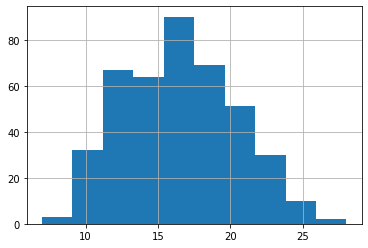

In [19]:
editors[editors.columns[2:]].sum(axis=1).hist()

In [11]:
tickets_clients = pd.merge(left=tickets,right=clients,how='left',left_on='client_id.1',right_on='id')

In [12]:
tickets_clients.head()

,Unnamed: 0_x,id_x,client_id,number_words,tone,language_pair,quality_score,price,client_id.1,Unnamed: 0_y,id_y,domain,category
0,0,C05739545,87.0,142,informal,pt_en,-1,-1,587fb1667c89615c53088cce45b602cc03ef251bcaf9e0...,489,587fb1667c89615c53088cce45b602cc03ef251bcaf9e0...,travel,Enterprise
1,2,C05739547,32.0,172,formal,pt_en,-1,-1,a59b8fa90a633fd2902283bfbe4dffa9c06e3420c03df5...,425,a59b8fa90a633fd2902283bfbe4dffa9c06e3420c03df5...,travel,Small
2,3,C05739550,32.0,344,informal,pt_en,-1,-1,36b322832c268a1fa9e64b30dc6490c6591d4b38ae28d2...,488,36b322832c268a1fa9e64b30dc6490c6591d4b38ae28d2...,travel,Enterprise
3,4,C05739554,80.0,1436,informal,fr_de,-1,-1,89225a3eb6c39c319e0175a029402b7d07bfba033fdba2...,304,89225a3eb6c39c319e0175a029402b7d07bfba033fdba2...,travel,Medium
4,5,C05739559,80.0,163,informal,pt_en,-1,-1,896eaafb9691dd3992336145e0b80bb71fdcded7fca603...,90,896eaafb9691dd3992336145e0b80bb71fdcded7fca603...,health_care,Enterprise


In [13]:
tickets.shape, tickets_clients.shape

((7788, 9), (7788, 13))

In [14]:
tasks_tickets_clients = pd.merge(left=tasks,right=tickets_clients,how='left',left_on='ticket_id',right_on='id_x')

In [15]:
print(tasks.shape, tasks_tickets_clients.shape)
tasks_tickets_clients.head()

(83153, 5) (83153, 18)


,Unnamed: 0,id,number_words_x,sequence_number,ticket_id,Unnamed: 0_x,id_x,client_id,number_words_y,tone,language_pair,quality_score,price,client_id.1,Unnamed: 0_y,id_y,domain,category
0,0,L139WPBDIEJG4PD2FOAWDMGC0XLFVEJO,40,1,C05739545,0,C05739545,87.0,142,informal,pt_en,-1,-1,587fb1667c89615c53088cce45b602cc03ef251bcaf9e0...,489,587fb1667c89615c53088cce45b602cc03ef251bcaf9e0...,travel,Enterprise
1,1,QKADER8M3USE69QGU1DPZRVAUZX8WDJI,40,2,C05739545,0,C05739545,87.0,142,informal,pt_en,-1,-1,587fb1667c89615c53088cce45b602cc03ef251bcaf9e0...,489,587fb1667c89615c53088cce45b602cc03ef251bcaf9e0...,travel,Enterprise
2,2,7FA5ED3SSU5QC2TNBX1Y3TOZDDVJ60ZY,40,3,C05739545,0,C05739545,87.0,142,informal,pt_en,-1,-1,587fb1667c89615c53088cce45b602cc03ef251bcaf9e0...,489,587fb1667c89615c53088cce45b602cc03ef251bcaf9e0...,travel,Enterprise
3,3,AUGNZGL3HUUKQICO2URO4VBA6TJPC1SI,22,4,C05739545,0,C05739545,87.0,142,informal,pt_en,-1,-1,587fb1667c89615c53088cce45b602cc03ef251bcaf9e0...,489,587fb1667c89615c53088cce45b602cc03ef251bcaf9e0...,travel,Enterprise
4,4,D3DUPMUSC7ZOX9DD3G8NP2CPUWNRH835,40,1,C05739547,2,C05739547,32.0,172,formal,pt_en,-1,-1,a59b8fa90a633fd2902283bfbe4dffa9c06e3420c03df5...,425,a59b8fa90a633fd2902283bfbe4dffa9c06e3420c03df5...,travel,Small


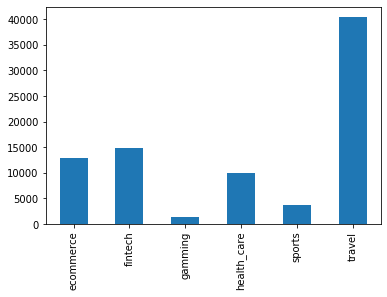

In [16]:
tasks_tickets_clients['domain'].value_counts().sort_index().plot(kind='bar')

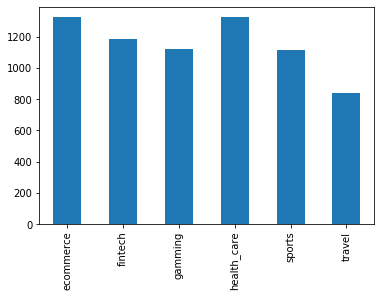

In [17]:
editors[editors.columns[2:]].sum(axis=0).sort_index().plot(kind='bar')

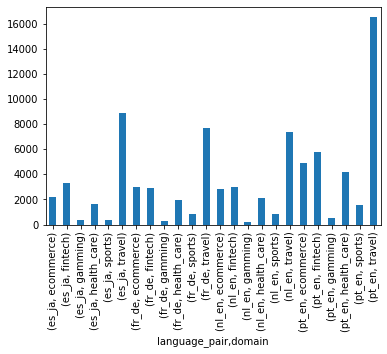

In [18]:
tasks_tickets_clients.groupby(['language_pair','domain']).size().plot(kind='bar')

In [19]:
tasks_tickets_clients['language_pair'].value_counts(normalize=True)

pt_en    0.402980
es_ja    0.200811
fr_de    0.200305
nl_en    0.195904
Name: language_pair, dtype: float64

In [103]:
# plan
# assign language_pair to editors randomly, at the same distribution of the tasks (40% pt_en, 20% for each of the others)
# then, task assignment will be 4 different, smaller problems
# quality will be a function of editors overall skill and the task's domain skill.
    # S.all = all skills, S.d = task's domain skill, quality = (sum(S.all)/30)* S.d/5 *100
# price is alpha*W*S.e - let's assume S.e = S.d, alpha = price per word
# two problems - increase quality and better distribute tasks - assuming a third, balance price/quality
# start by assuming equal distribution of tasks and check how optimization can increase quality
    # if it's too bad, create a model for task distribution based on skill
    #>> side >> a way to improve overal quality and better distribute tasks would be to duplicate tasks and assign to
    #  people with different skills, could have different skill tiers and this could be used to assess skill

# first, check how randomly assigning tasks impact quality and price
# then, optimize to max quality
# then, optimize to max quality and min price
# then, check if unbalancing task assinment can affect this

# graph editor skill stats - standard deviation per domain, overal skill, clear tiers? etc

76.66666666666667

In [27]:
editors.id.unique().size

418

In [28]:
# 75-100
# 50-75
# 25-50
# 0-25

[x/5 for x in range(1,6)]

[0.2, 0.4, 0.6, 0.8, 1.0]

In [20]:
skills='travel,fintech,ecommerce,sports,gamming,health_care'.split(',')
# skills
ss = editors.loc[1,skills].values.tolist()
print(ss)
(np.mean(ss)/5)*3/5

[3, 3, 4, 5, 3, 5]


0.4600000000000001

In [21]:
from random import seed, shuffle

In [22]:
np.random.seed(42)
a = np.arange(0,479)
np.random.shuffle(a)
a
len(editors.id)

418

In [23]:
editors.drop(editors.columns[0], axis=1, inplace=True)
editors.reset_index(inplace=True)

In [24]:
editors[editors['index']==321]

,index,id,travel,fintech,ecommerce,sports,gamming,health_care
321,321,12f9ceab17f39924297dbcae1eb096b430cd4284f1358d...,1,2,4,1,2,5


In [25]:
editors_r = editors.sample(frac=1,random_state=42)
editors_r.reset_index(drop=True,inplace=True)

In [26]:
tasks_tickets_clients.language_pair.sample(n=418,random_state=42).value_counts(normalize=True)

pt_en    0.442584
nl_en    0.212919
es_ja    0.177033
fr_de    0.167464
Name: language_pair, dtype: float64

In [27]:
editors_r['language_pair'] = tasks_tickets_clients.language_pair.sample(n=418,random_state=42).values

In [28]:
editors_r.head()

,index,id,travel,fintech,ecommerce,sports,gamming,health_care,language_pair
0,321,12f9ceab17f39924297dbcae1eb096b430cd4284f1358d...,1,2,4,1,2,5,pt_en
1,324,a269af2185b07a5755c9170640787c375f6d41db217e63...,1,4,4,3,1,2,pt_en
2,388,275f801125090b1662a59003de2b3524612c7cd784fb2b...,1,2,3,1,1,4,fr_de
3,56,750900301e7554def652bce932fe1e2a773167d4ced3e3...,3,3,4,1,3,5,pt_en
4,153,3130987415a7562accf70655e8343f327f5646d66a4777...,2,5,3,2,4,4,pt_en


In [29]:
domains='travel,fintech,ecommerce,sports,gamming,health_care'.split(',')
domains

['travel', 'fintech', 'ecommerce', 'sports', 'gamming', 'health_care']

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
a = tasks_tickets_clients['domain'].sample(100,random_state=42)
enc=OneHotEncoder()
b = enc.fit_transform(a[:,None]).toarray()
c = pd.DataFrame(b,columns=enc.categories_)

In [32]:
c = c.astype(int)[domains]

In [33]:
editors_r.iloc[:10][domains]

,travel,fintech,ecommerce,sports,gamming,health_care
0,1,2,4,1,2,5
1,1,4,4,3,1,2
2,1,2,3,1,1,4
3,3,3,4,1,3,5
4,2,5,3,2,4,4
5,1,5,3,3,5,3
6,1,2,5,2,3,2
7,1,3,5,1,4,3
8,1,4,5,2,1,2
9,1,2,4,1,1,4


In [34]:
c.iloc[:10]

,travel,fintech,ecommerce,sports,gamming,health_care
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
5,0,0,0,0,0,1
6,0,0,0,1,0,0
7,1,0,0,0,0,0
8,1,0,0,0,0,0
9,0,0,1,0,0,0


In [35]:
editors_r.iloc[:10][domains].values.sum(axis=1)/30 * (editors_r.iloc[:10][domains].values * c.iloc[:10].values).sum(axis=1)/5

array([0.1       , 0.4       , 0.08      , 0.38      , 0.66666667,
       0.4       , 0.2       , 0.11333333, 0.1       , 0.34666667])

In [44]:
tasks_tickets_clients[tasks_tickets_clients['language_pair']=='es_ja']

(16698, 18)

In [62]:
# tasks per editor
(tasks_tickets_clients['language_pair'].value_counts().sort_index()/\
editors_r['language_pair'].value_counts().sort_index()).astype(int)

es_ja    225
fr_de    237
nl_en    183
pt_en    181
Name: language_pair, dtype: int32

In [87]:
np.random.seed(42)
editors_r.iloc[:10][domains].sample(100, replace=True).index.value_counts().sort_index()

0     7
1    10
2     9
3     9
4    10
5     6
6    11
7    15
8    12
9    11
dtype: int64

In [249]:
np.random.seed(42)
a = np.concatenate((np.ones(5).reshape(1,5), np.zeros([3,5])),axis=0)
print(a)
while np.count_nonzero(a.sum(axis=1)) != a.shape[0]:
    np.apply_along_axis(np.random.shuffle,0,a)
    print(np.count_nonzero(a.sum(axis=1)) == a.shape[0])
print(a)

[[1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
False
False
False
False
True
[[0. 0. 0. 0. 1.]
 [0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]]


#### NL_EN

In [686]:
# nl_en
nl_en_tasks = tasks_tickets_clients.loc[tasks_tickets_clients['language_pair'] == 'nl_en']
enc=OneHotEncoder()
nl_en_jde = enc.fit_transform(nl_en_tasks['domain'][:,None]).toarray()
# fix col order to ['travel', 'fintech', 'ecommerce', 'sports', 'gamming', 'health_care']
nl_en_jdedf = pd.DataFrame(nl_en_jde,columns=enc.categories_)
nl_en_job_domain = nl_en_jdedf[domains].values
nl_en_job_domain.shape

(16290, 6)

In [687]:
nl_en_job_words = nl_en_tasks['number_words_x'].values
nl_en_job_words.shape

(16290,)

In [688]:
nl_en_editors = editors_r[editors_r['language_pair']=='nl_en']
nl_en_editors.shape

(89, 9)

In [693]:
nl_en_editor_domain_skill = nl_en_editors[domains].values
nl_en_editor_domain_skill.shape

(89, 6)

In [696]:
nl_en_editor_domain_quality = pd.DataFrame(nl_en_editor_domain_skill).apply(lambda x: np.mean(x/5)*(x/5),axis=1).values
nl_en_editor_domain_quality.shape

(89, 6)

In [938]:
shape = (89,16290)
mat1 = gen_rand_onezeromat(shape)

In [976]:
ini_pop = gen_pop(10,shape,42)

In [1000]:
def quality_per_job(_agent_job, _job_domain, _agent_domain_quality):
    """
    Returns the quality per task in a matrix of agent_jobs assignment
    """ 
    return (np.matmul(_job_domain, _agent_domain_quality.T) * _agent_job.T).sum(axis=1)

def price_per_job(_agent_job, _job_domain, _agent_domain_skill, _job_words, _price_per_word):
    """
    Returns the price per task in a matrix of agent_jobs assignment
    """
    return (np.matmul(_job_domain, _agent_domain_skill.T) * _agent_job.T).sum(axis=1) * _job_words * _price_per_word

In [ ]:
# _balance_penalty * range_factor * skew_factor * kurt_factor
0.5 * 0.1 | 0.01 * 

In [1033]:
def kf(x):
    return 1-x
kf(-2.5), kf(-0.2),kf(0.2), kf(2.5)

(3.5, 1.2, 0.8, -1.5)

In [ ]:
mat1_qual = quality_per_job(mat1, nl_en_job_domain, nl_en_editor_domain_quality)
mat1_price = price_per_job(mat1, nl_en_job_domain, nl_en_editor_domain_skill, nl_en_job_words, ppw)

In [1445]:
def ind_fit_func(_agent_job, _job_domain, _agent_domain_quality, _balance_penalty):
    """
    Consider quality and job assignment balance for now.
    """
    total_quality = quality_per_job(_agent_job, _job_domain, _agent_domain_quality).sum()
    jobs_per_agent = _agent_job.sum(axis=1)
    range_factor = 1/jobs_per_agent.ptp()  # the bigger the range between min and max jobs per agent, the lower this factor

    dist_skew = skew(jobs_per_agent)
    # the bigger the skewness in absolute value of the distribution of jobs per agents, the lower this factor 
    skew_factor = 1-np.abs(dist_skew)

    dist_kurt = kurtosis(jobs_per_agent)
    # the bigger the kurtosis of the distribution of jobs per agents, the lower this factor
    kurt_factor = 0.5*(2-dist_kurt)

    balance_factor = range_factor * skew_factor * kurt_factor 
    # if _balance_penalty=1, _balance_penalty**(balance_factor)=1; 
        # increase _balance_penalty to increase the importance of this factor
    fitness = total_quality * (_balance_penalty**balance_factor)
    
    return [fitness, total_quality, balance_factor, range_factor, dist_skew, dist_kurt]

[4715.206666666667, 4715.206666666667, 0.02324309620673792]


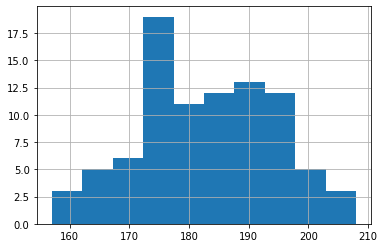

In [1424]:
popt=ini_pop[3]
print(ind_fit_func(popt, nl_en_job_domain, nl_en_editor_domain_quality, 1))
pd.Series(popt.sum(axis=1)).hist()

In [1446]:
def rank_pop(_pop, _job_domain, _agent_domain_quality, gen, _balance_penalty):
    """
    Ranks a population using hte fitness function ind_fit_func. Returns a dataframe sorted down by fitness.
    """
    colnames = ['index'] + 'fitness, total_quality, balance_factor, range_factor, dist_skew, dist_kurt'.split(', ')
    pop_rank = []
    for i in range(len(_pop)):
        pop_rank.append([i] + ind_fit_func(_pop[i], _job_domain, _agent_domain_quality, _balance_penalty))
    pop_rank_df = pd.DataFrame(pop_rank, columns=colnames).sort_values('fitness', ascending=False)
    pop_rank_df['gen'] = gen
    return pop_rank_df

In [1447]:
pop = [x.copy() for x in ini_pop]

In [ ]:
def next_gen(pop, pop_rank_df, elite_size, mut_rate):
    if elite_size%2!=0:
        raise Exception('elite_size should be even or pop will decrease')
    next_pop = []
    # pass elite to next generation
    elite_index = pop_rank_df['index'][:elite_size].values
    for i in elite_index:
        next_pop.append(pop[i])

    matingpool_size = pop_rank_df.shape[0]-elite_size
    # select mating pool based on fitness proportion
    fit_arr = pop_rank_df['fitness'].values
    fit_arr = np.array([i if i>0 else 1 for i in fit_arr])
    fit_prop = fit_arr/fit_arr.sum()
    selection = np.random.choice(pop_rank_df['index'],size=matingpool_size,replace=False,p=fit_prop)
    # crossovers
    for i in range(0,selection.size,2):
        offsp1, offsp2 = rand_iec(pop[selection[i]], pop[selection[i+1]])
        next_pop.append(offsp1)
        next_pop.append(offsp2)
    # mutations
    next_pop = mutate_pop(next_pop, mut_rate)
    return next_pop

def genetic_algorithm(_pop, elite_size, mut_rate, balance_penalty, 
                      generations, _job_domain, _agent_domain_quality):
    pop_ranks = []
    # pop zero
    pop_rank_df = rank_pop(_pop, _job_domain, _agent_domain_quality, 0, balance_penalty)
    pop_ranks.append(pop_rank_df)

    for gen in range(1,generations):
        pop = next_gen(_pop, pop_rank_df, elite_size, mut_rate)
        pop_rank_df = rank_pop(_pop, _job_domain, _agent_domain_quality, gen, balance_penalty)
        print(pop_rank_df.head(1))
        pop_ranks.append(pop_rank_df)
    return pop_ranks

In [1448]:
rank_pop(ini_pop, nl_en_job_domain, nl_en_editor_domain_quality,0,_balance_penalty=100).head(1)

,index,fitness,total_quality,balance_factor,range_factor,dist_skew,dist_kurt,gen
3,3,5247.916604,4715.206667,0.023243,0.019608,-0.049498,-0.494257,0


In [1437]:
shape = (89,16290)
ini_pop = gen_pop(10,shape,42)

elite_size = 2
mut_rate = 0.1
balance_penalty = 50
generations = 10

pop_ranks = genetic_algorithm(ini_pop, elite_size, mut_rate, balance_penalty, 
                      generations, nl_en_job_domain, nl_en_editor_domain_quality)

   index      fitness  total_quality   balance  gen
0      0  5335.955129    4749.973333  0.029736    1
   index      fitness  total_quality   balance  gen
0      0  5335.955129    4749.973333  0.029736    2
   index      fitness  total_quality   balance  gen
0      0  5335.955129    4749.973333  0.029736    3
   index      fitness  total_quality   balance  gen
0      0  5335.955129    4749.973333  0.029736    4
   index      fitness  total_quality   balance  gen
0      0  5335.955129    4749.973333  0.029736    5
   index      fitness  total_quality   balance  gen
0      0  5335.955129    4749.973333  0.029736    6
   index      fitness  total_quality   balance  gen
0      0  5335.955129    4749.973333  0.029736    7
   index      fitness  total_quality   balance  gen
0      0  5335.955129    4749.973333  0.029736    8
   index      fitness  total_quality   balance  gen
0      0  5335.955129    4749.973333  0.029736    9
   index      fitness  total_quality   balance  gen
0      0  53

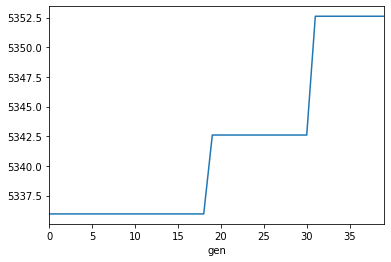

In [1438]:
allpop_ranks = pd.concat(pop_ranks)
allpop_ranks.groupby('gen')['fitness'].max().plot()

In [1370]:
(pop[0] == ini_pop[0]).mean()

0.9778053675998924

In [1177]:
pop[0],pop[1] = rand_iec(pop[0],pop[1])

8

In [1377]:
np.array([1,2.3])

array([1. , 2.3])

In [1381]:
a = np.array([1,2,3,-4,5])
[i if i>0 else 1 for i in a ]

[1, 2, 3, 1, 5]

In [1449]:
shape = (89,16290)
ini_pop2 = gen_pop(200,shape,42)

In [1450]:
pop = [x.copy() for x in ini_pop2]

In [1451]:
elite_size=20
mut_rate=0.1
balance_penalty=50
generations=500

pop_ranks=[]
# pop zero
pop_rank_df = rank_pop(pop, nl_en_job_domain, nl_en_editor_domain_quality, 0, balance_penalty)
pop_ranks.append(pop_rank_df)

for gen in range(1,generations):
    pop = next_gen(pop, pop_rank_df, elite_size, mut_rate)
    pop_rank_df = rank_pop(pop, nl_en_job_domain, nl_en_editor_domain_quality, gen, balance_penalty)
    print(pop_rank_df.head(1))
    pop_ranks.append(pop_rank_df)

   index      fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5236.387577    4770.506667        0.023819      0.017241   0.048626   

   dist_kurt  gen  
0  -0.904189    1  
    index      fitness  total_quality  balance_factor  range_factor  \
27     27  5295.200233         4716.9        0.029562          0.02   

    dist_skew  dist_kurt  gen  
27  -0.004151  -0.968568    2  
   index      fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5295.200233         4716.9        0.029562          0.02  -0.004151   

   dist_kurt  gen  
0  -0.968568    3  
   index      fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5295.200233         4716.9        0.029562          0.02  -0.004151   

   dist_kurt  gen  
0  -0.968568    4  
     index      fitness  total_quality  balance_factor  range_factor  \
165    165  5321.551575    4736.233333        0.029786      0.021277   

     dist_skew  dist_kurt  gen  
165  -

   index      fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5441.847674    4752.626667        0.034617       0.02439  -0.026466   

   dist_kurt  gen  
0  -0.915734   42  
   index      fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5441.847674    4752.626667        0.034617       0.02439  -0.026466   

   dist_kurt  gen  
0  -0.915734   43  
   index      fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5441.847674    4752.626667        0.034617       0.02439  -0.026466   

   dist_kurt  gen  
0  -0.915734   44  
   index      fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5441.847674    4752.626667        0.034617       0.02439  -0.026466   

   dist_kurt  gen  
0  -0.915734   45  
   index      fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5441.847674    4752.626667        0.034617       0.02439  -0.026466   

   dist_kurt  gen  
0  -0

   index      fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5529.643429        4737.82        0.039505      0.025641  -0.002296   

   dist_kurt  gen  
0  -1.088515   83  
   index      fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5529.643429        4737.82        0.039505      0.025641  -0.002296   

   dist_kurt  gen  
0  -1.088515   84  
   index      fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5529.643429        4737.82        0.039505      0.025641  -0.002296   

   dist_kurt  gen  
0  -1.088515   85  
   index      fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5529.643429        4737.82        0.039505      0.025641  -0.002296   

   dist_kurt  gen  
0  -1.088515   86  
   index      fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5529.643429        4737.82        0.039505      0.025641  -0.002296   

   dist_kurt  gen  
0  -1

   index      fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5573.717652    4740.906667        0.041368      0.027027   0.012567   

   dist_kurt  gen  
0  -1.100218  124  
   index      fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5573.717652    4740.906667        0.041368      0.027027   0.012567   

   dist_kurt  gen  
0  -1.100218  125  
   index      fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5573.717652    4740.906667        0.041368      0.027027   0.012567   

   dist_kurt  gen  
0  -1.100218  126  
     index      fitness  total_quality  balance_factor  range_factor  \
181    181  5582.723527    4734.306667        0.042137      0.027027   

     dist_skew  dist_kurt  gen  
181   -0.00656  -1.138739  127  
   index      fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5582.723527    4734.306667        0.042137      0.027027   -0.00656   

   dist_kurt  gen

   index     fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5600.48196    4747.946667        0.042214      0.027027  -0.002542   

   dist_kurt  gen  
0  -1.131766  165  
   index     fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5600.48196    4747.946667        0.042214      0.027027  -0.002542   

   dist_kurt  gen  
0  -1.131766  166  
   index     fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5600.48196    4747.946667        0.042214      0.027027  -0.002542   

   dist_kurt  gen  
0  -1.131766  167  
   index     fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5600.48196    4747.946667        0.042214      0.027027  -0.002542   

   dist_kurt  gen  
0  -1.131766  168  
   index     fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5600.48196    4747.946667        0.042214      0.027027  -0.002542   

   dist_kurt  gen  
0  -1.131766  1

   index      fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5608.635122    4747.453333        0.042612      0.027027   0.004059   

   dist_kurt  gen  
0  -1.166139  206  
   index      fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5608.635122    4747.453333        0.042612      0.027027   0.004059   

   dist_kurt  gen  
0  -1.166139  207  
   index      fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5608.635122    4747.453333        0.042612      0.027027   0.004059   

   dist_kurt  gen  
0  -1.166139  208  
   index      fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5608.635122    4747.453333        0.042612      0.027027   0.004059   

   dist_kurt  gen  
0  -1.166139  209  
   index      fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5608.635122    4747.453333        0.042612      0.027027   0.004059   

   dist_kurt  gen  
0  -1

   index      fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5616.680452        4745.14        0.043103      0.027027  -0.003357   

   dist_kurt  gen  
0  -1.200363  247  
   index      fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5616.680452        4745.14        0.043103      0.027027  -0.003357   

   dist_kurt  gen  
0  -1.200363  248  
   index      fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5616.680452        4745.14        0.043103      0.027027  -0.003357   

   dist_kurt  gen  
0  -1.200363  249  
    index      fitness  total_quality  balance_factor  range_factor  \
57     57  5622.906426    4744.366667        0.043428      0.027778   

    dist_skew  dist_kurt  gen  
57  -0.047594  -1.283057  250  
   index      fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5622.906426    4744.366667        0.043428      0.027778  -0.047594   

   dist_kurt  gen  
0

   index     fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5637.98644    4740.646667        0.044313      0.027778  -0.031703   

   dist_kurt  gen  
0  -1.294995  288  
    index      fitness  total_quality  balance_factor  range_factor  \
24     24  5654.622882        4754.22        0.044335      0.027778   

    dist_skew  dist_kurt  gen  
24  -0.032624  -1.299797  289  
   index      fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5654.622882        4754.22        0.044335      0.027778  -0.032624   

   dist_kurt  gen  
0  -1.299797  290  
   index      fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5654.622882        4754.22        0.044335      0.027778  -0.032624   

   dist_kurt  gen  
0  -1.299797  291  
   index      fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5654.622882        4754.22        0.044335      0.027778  -0.032624   

   dist_kurt  gen  
0  

   index      fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5655.493051    4766.333333        0.043724      0.027027  -0.011577   

   dist_kurt  gen  
0  -1.273486  329  
   index      fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5655.493051    4766.333333        0.043724      0.027027  -0.011577   

   dist_kurt  gen  
0  -1.273486  330  
   index      fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5655.493051    4766.333333        0.043724      0.027027  -0.011577   

   dist_kurt  gen  
0  -1.273486  331  
   index      fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5655.493051    4766.333333        0.043724      0.027027  -0.011577   

   dist_kurt  gen  
0  -1.273486  332  
   index      fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5655.493051    4766.333333        0.043724      0.027027  -0.011577   

   dist_kurt  gen  
0  -1

   index      fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5733.620637    4759.633333        0.047591      0.029412  -0.013287   

   dist_kurt  gen  
0  -1.279756  370  
   index      fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5733.620637    4759.633333        0.047591      0.029412  -0.013287   

   dist_kurt  gen  
0  -1.279756  371  
   index      fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5733.620637    4759.633333        0.047591      0.029412  -0.013287   

   dist_kurt  gen  
0  -1.279756  372  
   index      fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5733.620637    4759.633333        0.047591      0.029412  -0.013287   

   dist_kurt  gen  
0  -1.279756  373  
   index      fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5733.620637    4759.633333        0.047591      0.029412  -0.013287   

   dist_kurt  gen  
0  -1

   index      fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5733.620637    4759.633333        0.047591      0.029412  -0.013287   

   dist_kurt  gen  
0  -1.279756  411  
   index      fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5733.620637    4759.633333        0.047591      0.029412  -0.013287   

   dist_kurt  gen  
0  -1.279756  412  
   index      fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5733.620637    4759.633333        0.047591      0.029412  -0.013287   

   dist_kurt  gen  
0  -1.279756  413  
   index      fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5733.620637    4759.633333        0.047591      0.029412  -0.013287   

   dist_kurt  gen  
0  -1.279756  414  
   index      fitness  total_quality  balance_factor  range_factor  dist_skew  \
0      0  5733.620637    4759.633333        0.047591      0.029412  -0.013287   

   dist_kurt  gen  
0  -1

KeyboardInterrupt: 

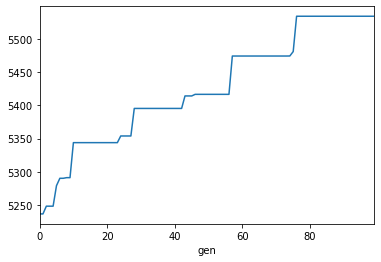

In [1443]:
allpop_ranks = pd.concat(pop_ranks)
allpop_ranks.groupby('gen')['fitness'].max().plot()

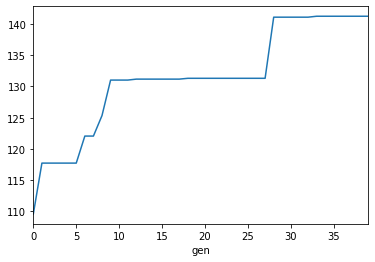

In [1434]:
allpop_ranks.groupby('gen')['fitness'].max().plot()

In [1444]:
pop_ranks[-1]

,index,fitness,total_quality,balance,gen
0,0,5534.228780,4734.360000,0.039904,99
1,1,5528.633407,4729.573333,0.039904,99
2,2,5506.071569,4737.826667,0.038413,99
3,3,5504.997244,4709.353333,0.039904,99
4,4,5490.239831,4731.440000,0.038022,99
...,...,...,...,...,...
45,45,4938.638207,4751.786667,0.009859,99
37,37,4923.714780,4727.593333,0.010390,99
44,44,4915.948922,4725.473333,0.010101,99
88,88,4912.833138,4749.833333,0.008625,99


In [884]:
# minimal example
from io import StringIO
agent_job = pd.read_csv(StringIO("""
1	0	0	0	1
0	1	0	1	0
0	0	1	0	0
"""),sep='\t',header=None,index_col=False).values

job_domain = pd.read_csv(StringIO("""
1	0
0	1
1	0
0	1
1	0
"""),sep='\t',header=None,index_col=False).values

job_domain = pd.read_csv(StringIO("""
1	0
0	1
1	0
0	1
1	0
"""),sep='\t',header=None,index_col=False).values

job_words = pd.read_csv(StringIO("""
40
32
25
35
24
"""),sep='\t',header=None,index_col=False).values.flatten()

agent_domain_skill = pd.read_csv(StringIO("""
5	3
1	2
2	4
"""),sep='\t',header=None,index_col=False).values

price_per_word = 0.02

In [455]:
print(agent_domain_skill)
# quality per domain will be average quality * domain quality
agent_domain_quality = pd.DataFrame(agent_domain_skill).apply(lambda x: np.mean(x/5)*(x/5),axis=1).values
print(agent_domain_quality)

[[5 3]
 [1 2]
 [2 4]]
[[0.8  0.48]
 [0.06 0.12]
 [0.24 0.48]]


In [384]:
print(agent_job)
np.apply_along_axis(np.random.shuffle,0,agent_job)
while np.count_nonzero(agent_job.sum(axis=1)) != agent_job.shape[0]:
    np.apply_along_axis(np.random.shuffle,0,agent_job)
    print(np.count_nonzero(agent_job.sum(axis=1)) == agent_job.shape[0])
print(agent_job)

[[0 0 0 0 1]
 [1 0 0 0 0]
 [0 1 1 1 0]]
[[0 1 0 1 0]
 [0 0 1 0 0]
 [1 0 0 0 1]]


In [440]:
## price calc
print('job per agent')
print(agent_job.T)
print('-------------------')

# this wields job on rows and agent on columns, filled with domain skill
print('job_agent_skill')
print(np.matmul(job_domain, agent_domain_skill.T))
print('-------------------')

# times agent_job, will give job_skill
print('job_skill')
print(np.matmul(job_domain, agent_domain_skill.T) * agent_job.T)
print('-------------------')

# this summed on axis 1, times job_words times price_per_word will give price per job
print('price per job')
(np.matmul(job_domain, agent_domain_skill.T) * agent_job.T).sum(axis=1) * job_words * price_per_word

job per agent
[[1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]]
-------------------
job_agent_skill
[[5 1 2]
 [3 2 4]
 [5 1 2]
 [3 2 4]
 [5 1 2]]
-------------------
job_skill
[[5 0 0]
 [0 2 0]
 [0 0 2]
 [0 2 0]
 [5 0 0]]
-------------------
price per job


array([4.  , 1.28, 1.  , 1.4 , 2.4 ])

,index,fitness,total_quality,balance,gen
3,3,109.596002,4715.206667,0.023243,0
1,1,96.838034,4709.000000,0.020564,0
2,2,79.688270,4757.706667,0.016749,0
5,5,61.545034,4657.873333,0.013213,0
6,6,50.647902,4709.193333,0.010755,0
9,9,50.595173,4736.600000,0.010682,0
7,7,43.913058,4749.840000,0.009245,0
8,8,37.514985,4717.646667,0.007952,0
4,4,29.075474,4743.613333,0.006129,0
0,0,18.898704,4741.713333,0.003986,0


In [1078]:
ini_pop[3].sum(axis=1).max()

208.0

In [ ]:
for i in range(10):
    agent_job = gen_rand_onezeromat((3,5))
    price = ((np.matmul(job_domain, agent_domain_skill.T) * agent_job.T).sum(axis=1) * job_words * price_per_word).sum()
    qual = (np.matmul(job_domain, agent_domain_quality.T) * agent_job.T).sum(axis=1).sum()
    print(f'{price:.2f}, {qual:.2f}')

In [469]:
## average quality calc
# (np.matmul(job_domain, agent_domain_quality.T) * agent_job.T).sum(axis=1).mean()
# this wields job/agent filled with agent quality
print('job per agent_quality')
print(np.matmul(job_domain, agent_domain_quality.T))
print('--------------')

# times job per agent wields quality per job
print('quality per job')
print(np.matmul(job_domain, agent_domain_quality.T) * agent_job.T)
print('--------------')

# summed on axis 1 wields quality per job
print('quality per job')
quality_job = (np.matmul(job_domain, agent_domain_quality.T) * agent_job.T).sum(axis=1)
print(quality_job)

print(f'mean: {quality_job.mean():.2}, median: {np.median(quality_job):.2}')

job per agent_quality
[[0.8  0.06 0.24]
 [0.48 0.12 0.48]
 [0.8  0.06 0.24]
 [0.48 0.12 0.48]
 [0.8  0.06 0.24]]
--------------
quality per job
[[0.8  0.   0.  ]
 [0.   0.12 0.  ]
 [0.   0.   0.24]
 [0.   0.12 0.  ]
 [0.8  0.   0.  ]]
--------------
quality per job
[0.8  0.12 0.24 0.12 0.8 ]
mean: 0.42, median: 0.24


In [892]:
agent_job_ini = agent_job.copy() 

In [935]:
for i in range(10):
    agent_job = gen_rand_onezeromat((3,5))
    price = ((np.matmul(job_domain, agent_domain_skill.T) * agent_job.T).sum(axis=1) * job_words * price_per_word).sum()
    qual = (np.matmul(job_domain, agent_domain_quality.T) * agent_job.T).sum(axis=1).sum()
    print(f'{price:.2f}, {qual:.2f}')

6.92, 1.32
8.28, 1.70
10.72, 2.44
10.20, 2.06
9.48, 2.06
9.24, 2.06
7.08, 1.50
12.26, 2.62
6.30, 1.32
9.56, 1.70


In [890]:
def shuffle_mat_nozerorow(mat_a):
    """
    Shuffle each matrix column independently, making sure there's no row with only zeros.
    This is done inplace on the matrix passed, pass with .copy (should increase time).
    """
    count=1
    while np.count_nonzero(mat_a.sum(axis=1)) != mat_a.shape[0]:
        np.apply_along_axis(np.random.shuffle,0,mat_a)
        count+=1
        if count>1e+04:
            raise Exception('cannnot find a matrix with no row with only zeros')
            break
    return mat_a

def gen_rand_onezeromat(shape:tuple):
    """
    Generates a random one-zero matrix, with no zero-only rows.
    """
    mat_a = np.concatenate((np.ones(shape[1]).reshape(1,shape[1]), np.zeros([shape[0]-1,shape[1]])),axis=0)
    return shuffle_mat_nozerorow(mat_a)

def gen_pop(_popsize, shape:tuple, seed):
    """
    Returns a list of random one-zero matrices, with no zero-only rows.
    """
    np.random.seed(seed)
    pop = []
    for i in range(_popsize):
        pop.append(gen_rand_onezeromat(shape))
    return pop
    

a = gen_pop(4,(6,8),42)
[print(x.sum(axis=1),x.sum(axis=0)) for x in a]

[1. 1. 1. 1. 1. 3.] [1. 1. 1. 1. 1. 1. 1. 1.]
[2. 1. 2. 1. 1. 1.] [1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 3. 1. 1.] [1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 3. 1. 1. 1.] [1. 1. 1. 1. 1. 1. 1. 1.]


[None, None, None, None]

Inversion exchange crossover    
<img src="IEC.png" width=500 align='left'>

In [1171]:
def iec(mat_a, mat_b, bp):
    """
    Inversion exchange crossover.
    Returns a tuple of mat_a and mat_b with column range exchanged and inverted at the breakpoints bp.
    """
    return np.concatenate([mat_a[:,:bp[0]],np.flip(mat_b[:,bp[0]:bp[1]],axis=1),mat_a[:,bp[1]:]],axis=1),\
    np.concatenate([mat_b[:,:bp[0]],np.flip(mat_a[:,bp[0]:bp[1]],axis=1),mat_b[:,bp[1]:]],axis=1)

def rand_iec(mat_a, mat_b):
    """
    Random Inversion exchange crossover.
    iec with random breakpoints.
    """
    bp = np.sort(np.random.choice(np.arange(mat_a.shape[1]),2,replace=False))
    return iec(mat_a, mat_b, bp)

def mutate(mat_a):
    """
    Swap adjacent columns on a random mutation point mt.
    This is done in place, pass with .copy to avoid.
    """
    mt = np.random.choice(np.arange(mat_a.shape[1]))
    mat_a[:,mt-1], mat_a[:,mt] = mat_a[:,mt], mat_a[:,mt-1].copy()
    return mat_a

def mutate_pop(_pop:list, _mut_rate:float):
    """
    Mutate population at given mutation rate.
    This is done in place, pass with .copy to avoid.
    Example:
    pop = gen_pop(10,(5,10),42)
    pop2 = mutate_pop([x.copy() for x in pop],0.2)
    [(a==b).mean() for a,b in zip(pop,pop2)]
    """
    for ind in _pop:
        if np.random.rand() <= _mut_rate:
            mutate(ind)
    return _pop

In [871]:
pop = gen_pop(10,(5,10),42)

In [872]:
[print(x.sum(axis=1)) for x in pop]

[2. 2. 2. 2. 1. 1.]
[2. 2. 1. 3. 1. 1.]
[1. 2. 3. 1. 1. 2.]
[1. 2. 1. 1. 2. 3.]
[1. 2. 2. 1. 1. 3.]
[1. 2. 1. 1. 1. 4.]
[1. 1. 5. 1. 1. 1.]
[1. 2. 1. 1. 2. 3.]
[3. 1. 2. 1. 2. 1.]
[1. 2. 3. 2. 1. 1.]


[None, None, None, None, None, None, None, None, None, None]

In [878]:
# fitness
"""
3 points will affect the fitness: quality, job allocation balance and price
- Quality: sum quality of all the tasks. Quality per task is calculated as the agent's skill in the task domain 
    weighted by the average agent's skill.
- Allocation balance: a factor of how many tasks are allocated per agent. Too much concentration is not desired.
    Can check for average allocation, skewness and kurtosis, range factor = 1/(max-min)
- Price: product of the task's number of words, the agent's skill in the task's domain and price per word

"""
np.count_nonzero(mat_a.sum(axis=1))/mat_a.shape[0]


1.0

[1.0,
 1.0,
 1.0,
 1.0,
 0.9333333333333333,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9333333333333333]

In [784]:
mutate(pop[1])

array([[1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [785]:
(pop1 == pop[1]).mean()

0.9333333333333333